<a href="https://colab.research.google.com/github/aws3ma/data-wrangling/blob/main/Evaluation_dw(IDSD2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabelsi Oussema 2IDSD2

La base de données "economic.csv" contient 6 variables détaillées comme suit: 
- **Country** : le nom du pays
- **Region** : le nom du continent du pays
- **Agriculture_emp** : le taux d'employabilité du secteur agricole
- **Industry_emp** : le taux d'employabilité du secteur industriel
- **Services_emp** : le taux d'employabilité du secteur services
- **Population_density** : nombre d'habitants par Km^2

---
    1)
      * importer seulement la bibliothèque pandas
      * Dans df, lire le contenu du fichier "economic.csv"
      * Afficher les 5 premières lignes de df (1pt)
---

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
dw_folder='/content/drive/MyDrive/DataWrangling/'

Mounted at /content/drive


In [7]:
df = pd.read_csv(dw_folder+'economic.csv')
df.head()

,Country,Region,Agriculture_emp,Industry_emp,Services_emp,Population_density
0,Afghanistan,Asia,61.6,10.0,28.5,54.4
1,Albania,Europe,41.4,18.3,40.3,106.9
2,Algeria,Africa,10.8,34.5,54.7,17.3
3,American Samoa,Oceania,NaN,NaN,NaN,278.2
4,Andorra,Europe,NaN,NaN,NaN,163.8


---
    2) Afficher le nombre de valeurs nulles pour chaque colonne du dataframe df (1pt)
---

In [8]:
df.isna().sum()

Country                0
Region                 0
Agriculture_emp       35
Industry_emp          35
Services_emp          35
Population_density     0
dtype: int64

---
    3) 
      * Supprimer de df les lignes qui contiennent des valeurs nulles
      * Afficher de nouveau les 5 premières lignes de df (1pt)
---

In [51]:
df.dropna(axis=0,inplace=True)
df.head()

,Country,Region,Agriculture_emp,Industry_emp,Services_emp,Population_density
0,Afghanistan,Asia,61.6,10.0,28.5,54.4
1,Albania,Europe,41.4,18.3,40.3,106.9
2,Algeria,Africa,10.8,34.5,54.7,17.3
5,Angola,Africa,4.2,37.6,58.2,23.9
8,Argentina,America,2.0,24.8,73.1,16.2


---
    4) Afficher le nombre de pays par Region (1pt)
---

In [14]:
df.Region.value_counts()

Africa     53
Asia       50
Europe     40
America    39
Oceania    12
Name: Region, dtype: int64

---
    5) Dans df1, afficher en ordre décroissant de "Population_density" les pays (garder toutes les colonnes) dont la variable Population_density
    est une valeur abbérante (1.5 pt)
---

In [18]:
q1 = df.Population_density.quantile(0.25)
q3 = df.Population_density.quantile(0.75)
irq = q3 - q1
lower_limit = q1 - irq * 1.5
upper_limit = q3 + irq * 1.5 
df1 = df[(df.Population_density<lower_limit)|(df.Population_density>upper_limit)]
df1.sort_values(by="Population_density",axis=0,ascending=False)

,Country,Region,Agriculture_emp,Industry_emp,Services_emp,Population_density
44,Macao,Asia,0.3,17.7,82.1,20821.6
182,Singapore,Asia,0.3,17.0,82.6,8155.5
43,Hong Kong,Asia,0.2,14.9,84.9,7014.2
15,Bahrain,Asia,1.0,33.4,65.6,1963.9
123,Maldives,Asia,7.7,22.8,69.5,1454.4
125,Malta,Europe,1.2,20.9,77.9,1346.4
16,Bangladesh,Asia,40.6,19.1,40.3,1265.0
22,Bermuda,America,1.6,10.3,87.6,1227.0
41,Channel Islands,Europe,5.0,24.5,70.5,870.1
192,State of Palestine,Asia,8.7,29.8,61.5,817.4


---
    6) Afficher pour chaque Region, le nombre de pays ayant la variable Population_density comme valeur abbérante (1.5 pt)
---

In [21]:
df1.Region.value_counts()

Asia       9
America    3
Europe     3
Africa     2
Name: Region, dtype: int64

---
    7) A partir de df1, afficher sous forme de barres verticales les variables (Agriculture_emp, Industry_emp, Services_emp) de chaque
    pays de la région Africa (1.5 pt)
---

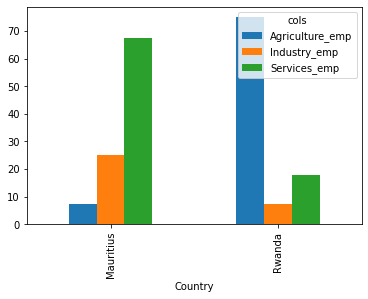

In [35]:
df11 = df1[df1.Region=="Africa"]
df11= df11.filter(['Country','Agriculture_emp','Industry_emp','Services_emp'])
df11=df11.melt(id_vars = ['Country'],
var_name = 'cols',
value_name='vals')

df11 = df11.pivot(index = 'Country',
columns = 'cols',
values = 'vals')
df11.plot.bar()

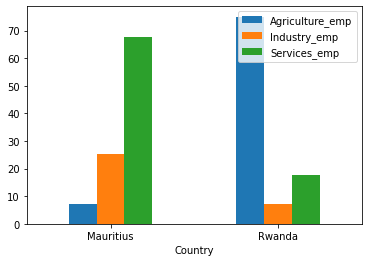

---
    8) Dans df2, afficher pour chaque region le pays (Region, Country, Agriculture_emp) qui la plus grande valeur de Agriculture_emp (1.5 pt)
---

In [40]:
df2 = df.filter(['Region','Country','Agriculture_emp'])
df22 = df2.groupby(['Region']).Agriculture_emp.max()
df2.merge(df22)

,Region,Country,Agriculture_emp
0,Europe,Albania,41.4
1,Africa,Burundi,91.1
2,America,Haiti,46.9
3,Asia,Lao People's Democratic Republic,78.3
4,Oceania,Papua New Guinea,68.3


---
    9) Dans df3, afficher pour le pays Tunisia le taux d'employabilité des trois secteurs dans un ordre décroissant (1.5 pt) 
---

In [48]:
df3 = df[df.Country=='Tunisia']
df3=df3.filter(['Country','Region','Services_emp','Industry_emp','Agriculture_emp'])
df3 = df3.melt(id_vars = ['Country','Region'],
var_name = 'Secteur',
value_name='Taux')
df3.sort_values(by="Taux",ascending=False)

,Country,Region,Secteur,Taux
0,Tunisia,Africa,Services_emp,58.9
1,Tunisia,Africa,Industry_emp,29.4
2,Tunisia,Africa,Agriculture_emp,11.7


,Country,Region,Secteur,Taux
2,Tunisia,Africa,Services_emp,58.9
1,Tunisia,Africa,Industry_emp,29.4
0,Tunisia,Africa,Agriculture_emp,11.7


---
    10) A partir de df3, afficher le taux d'employabilité des différents secteurs sous forme de secteur (1.5 pt)
---

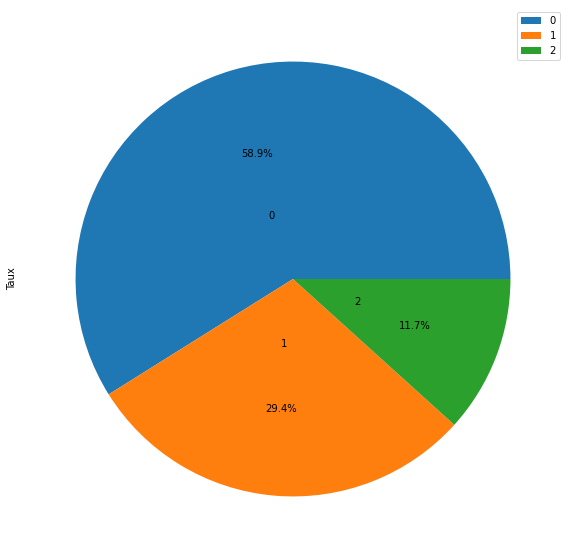

In [50]:
df3.plot.pie(y="Taux",figsize=(10,10),pctdistance = 0.6, labeldistance = 0.3,autopct = lambda x:str(round(x, 2))+'%')

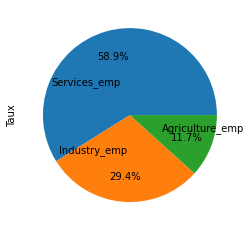